In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/KOLEXLAW1 FILE/Python workbook/PYTHON PROJECT CUSTOMER-CHURN/Customer-Churn.csv")

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
## cleaning data , change the Total charges to numeric value
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<Axes: >

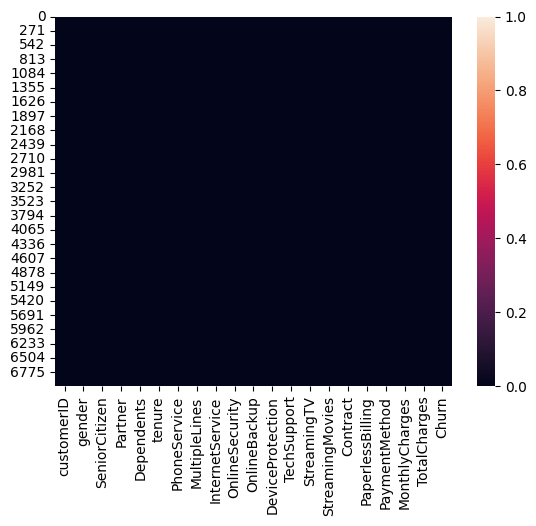

In [ ]:
sns.heatmap(data.isna())

In [ ]:
categorical_data= data.select_dtypes(include="object")

In [ ]:
numerical_data =data.select_dtypes(include= "number")

<Axes: xlabel='gender', ylabel='count'>

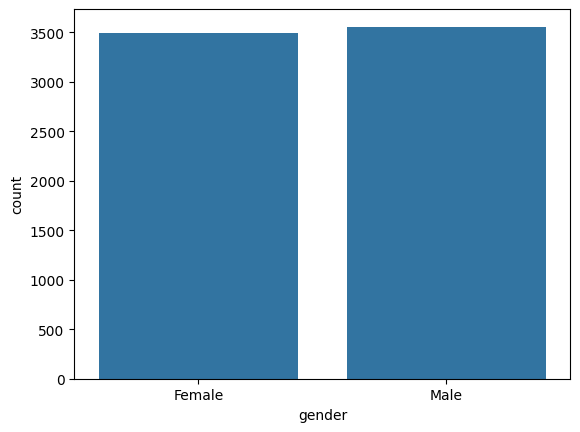

In [ ]:
sns.countplot(x=data['gender'])

<Axes: xlabel='SeniorCitizen', ylabel='count'>

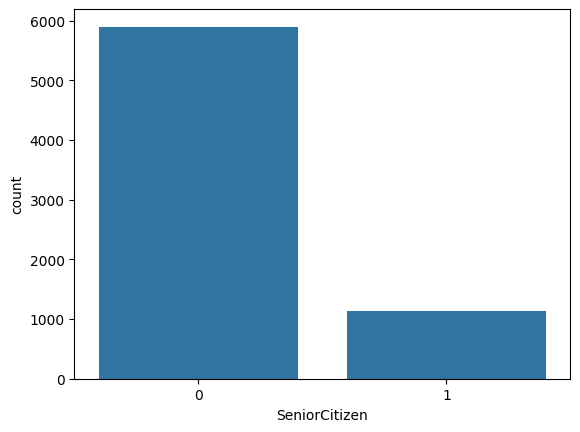

In [ ]:
sns.countplot(x=data['SeniorCitizen'])

<Axes: xlabel='Partner', ylabel='count'>

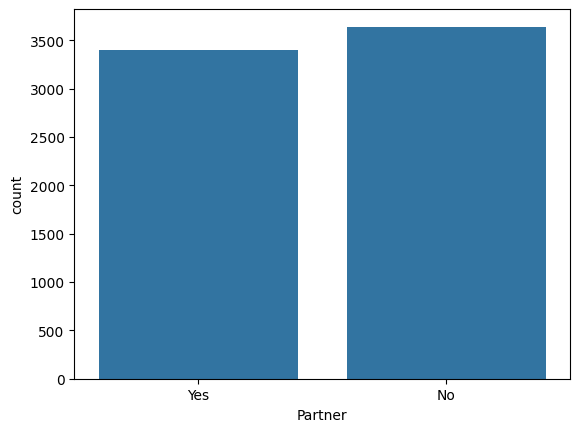

In [ ]:
sns.countplot(x=data['Partner'])

<Axes: xlabel='Dependents', ylabel='count'>

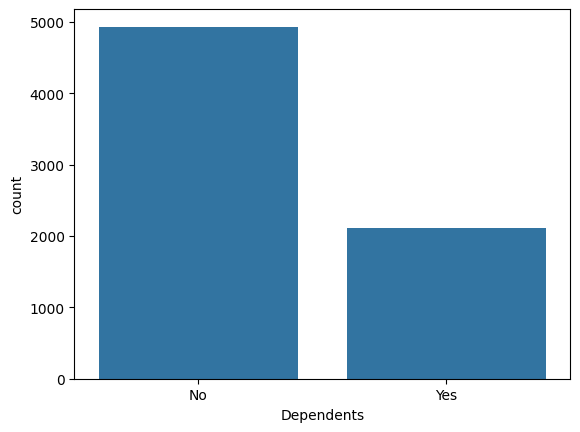

In [ ]:
sns.countplot(x=data['Dependents'])

<Axes: xlabel='PhoneService', ylabel='count'>

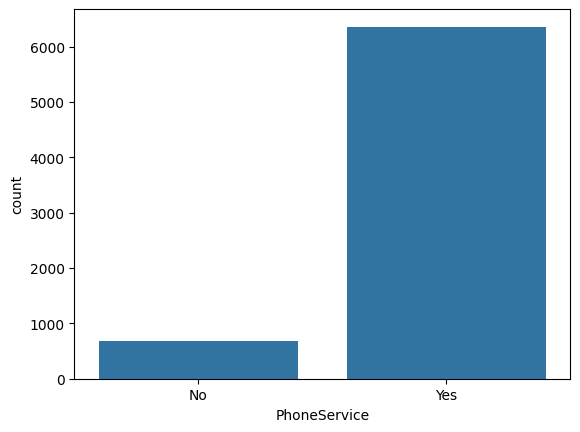

In [ ]:
sns.countplot(x=data['PhoneService'])

<Axes: xlabel='MultipleLines', ylabel='count'>

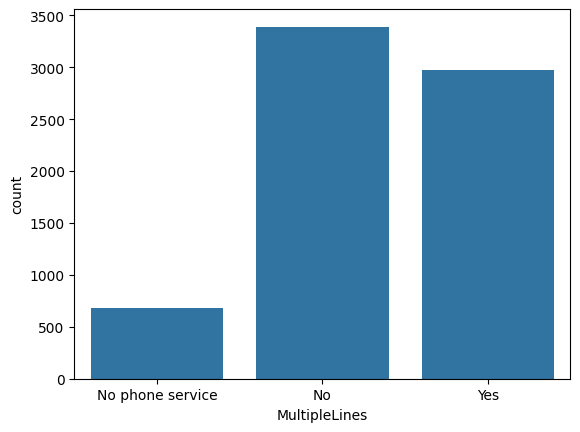

In [ ]:
sns.countplot(x=data['MultipleLines'])

<Axes: xlabel='TechSupport', ylabel='count'>

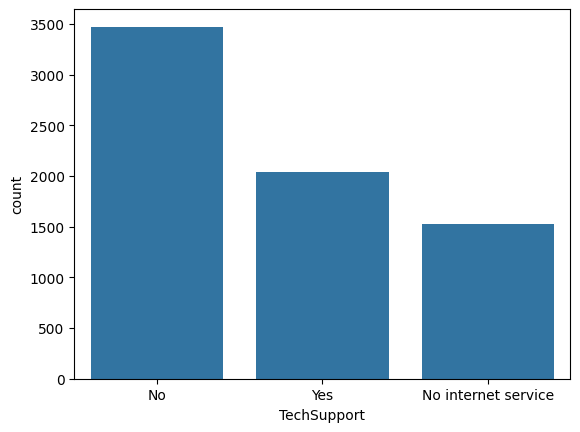

In [ ]:
sns.countplot(x=data['TechSupport'])

<Axes: xlabel='OnlineSecurity', ylabel='count'>

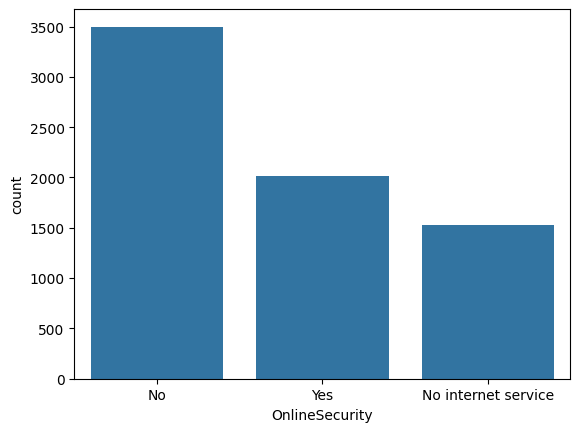

In [ ]:
sns.countplot(x=data['OnlineSecurity'])

<Axes: xlabel='OnlineBackup', ylabel='count'>

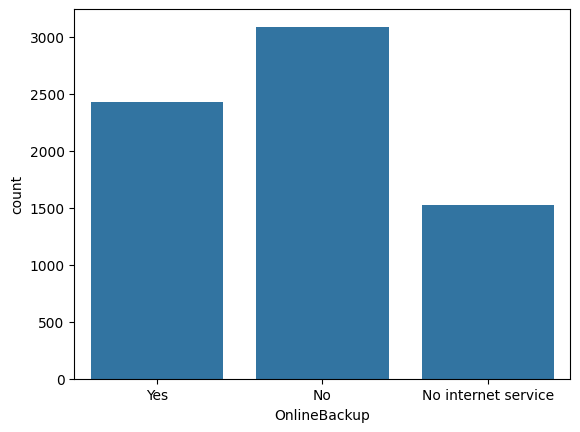

In [ ]:
sns.countplot(x=data['OnlineBackup'])

<Axes: xlabel='DeviceProtection', ylabel='count'>

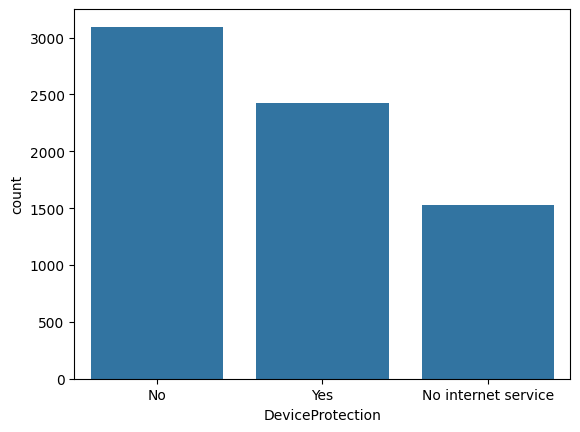

In [ ]:
sns.countplot(x=data['DeviceProtection'])

<Axes: xlabel='StreamingTV', ylabel='count'>

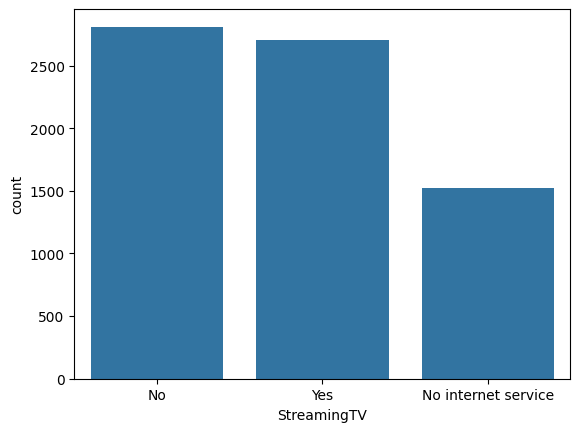

In [ ]:
sns.countplot(x=data['StreamingTV'])

<Axes: xlabel='StreamingMovies', ylabel='count'>

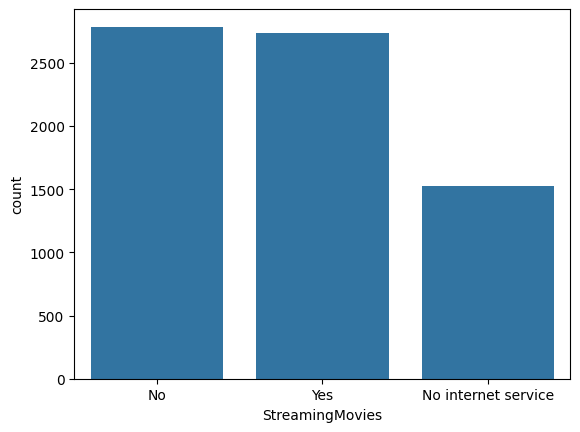

In [ ]:
sns.countplot(x=data['StreamingMovies'])

<Axes: xlabel='Contract', ylabel='count'>

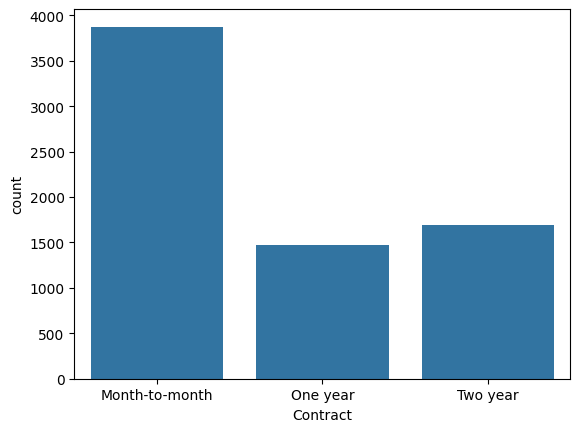

In [ ]:
sns.countplot(x=data['Contract'])

<Axes: xlabel='PaperlessBilling', ylabel='count'>

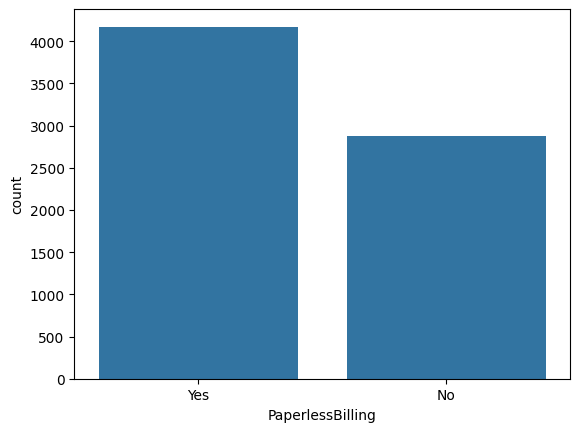

In [ ]:
sns.countplot(x=data['PaperlessBilling'])

<Axes: xlabel='PaymentMethod', ylabel='count'>

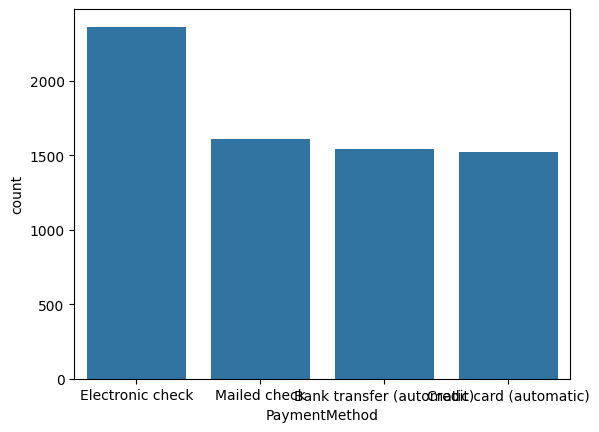

In [ ]:
sns.countplot(x=data['PaymentMethod'])

<Axes: xlabel='Churn', ylabel='count'>

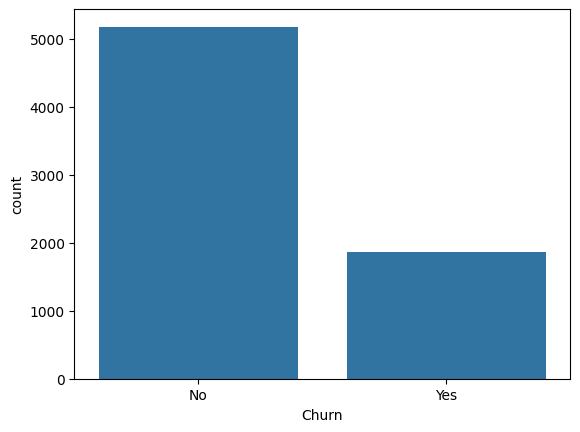

In [ ]:
sns.countplot(x=data['Churn'])

In [ ]:
## univarite analysis on numerical_data

In [ ]:
numerical_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


<Axes: xlabel='tenure', ylabel='count'>

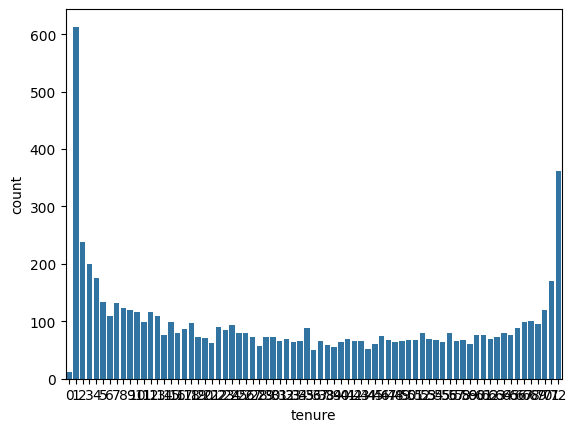

In [ ]:
sns.countplot(x=data['tenure'])

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

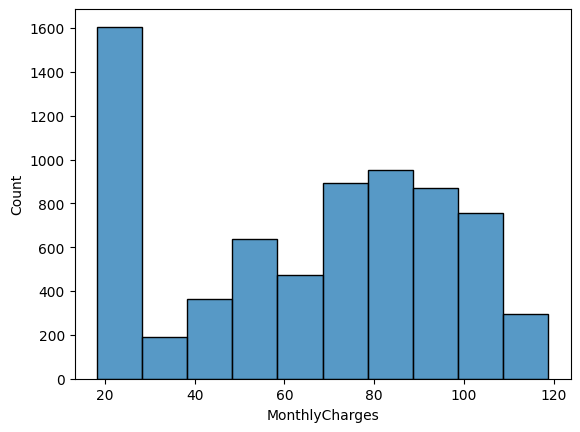

In [ ]:
sns.histplot(data=data['MonthlyCharges'], bins= 10)

<Axes: xlabel='TotalCharges'>

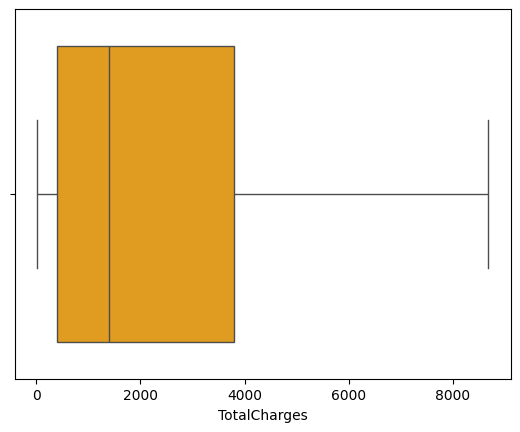

In [ ]:
sns.boxplot(data=data['TotalCharges'], orient='h', color="orange")

In [ ]:
## BIVARITE ANALSYS ON CATEGORICAL_DATA

In [ ]:
## to perform categorical eda
def perform_categorical_eda(col, hue_y ,data=data , categorical_data=categorical_data):
    fig, axs = plt.subplots( nrows =1 , ncols = 2 , figsize =(12, 6))
    sns.countplot (data= categorical_data, x = col, hue = hue_y ,ax =axs[0])
    sns.pointplot( x = col , y = hue_y, data = data ,ax =axs[1])

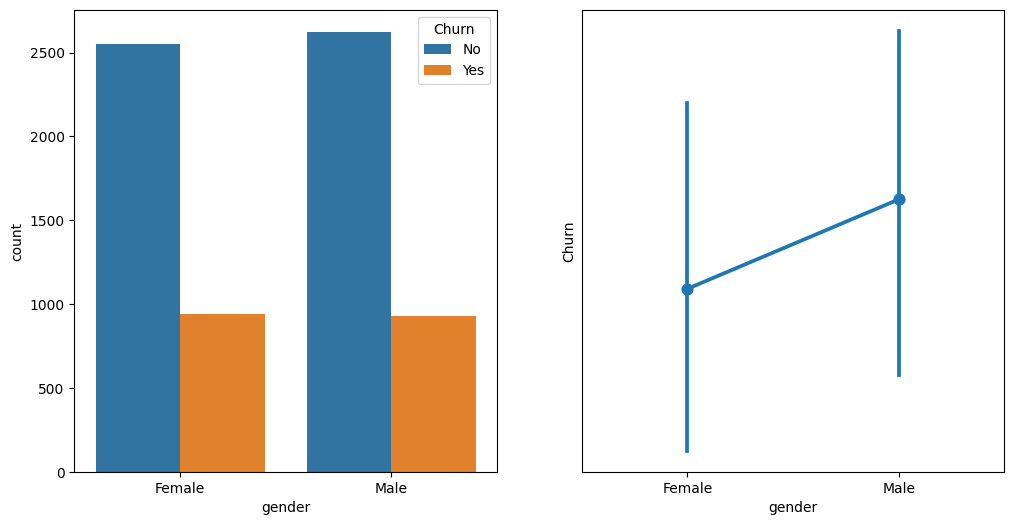

In [ ]:
perform_categorical_eda("gender" , hue_y = "Churn")

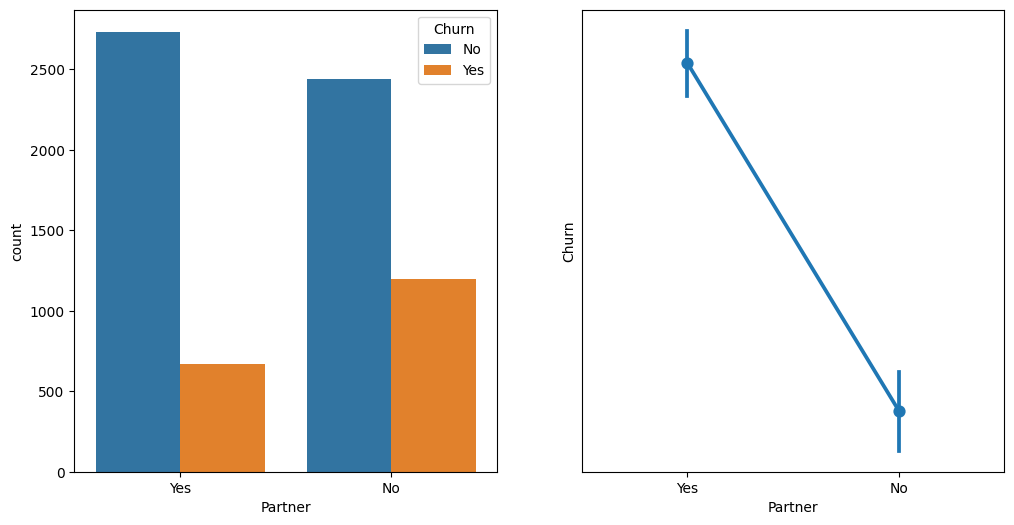

In [ ]:
perform_categorical_eda("Partner" , hue_y = "Churn")

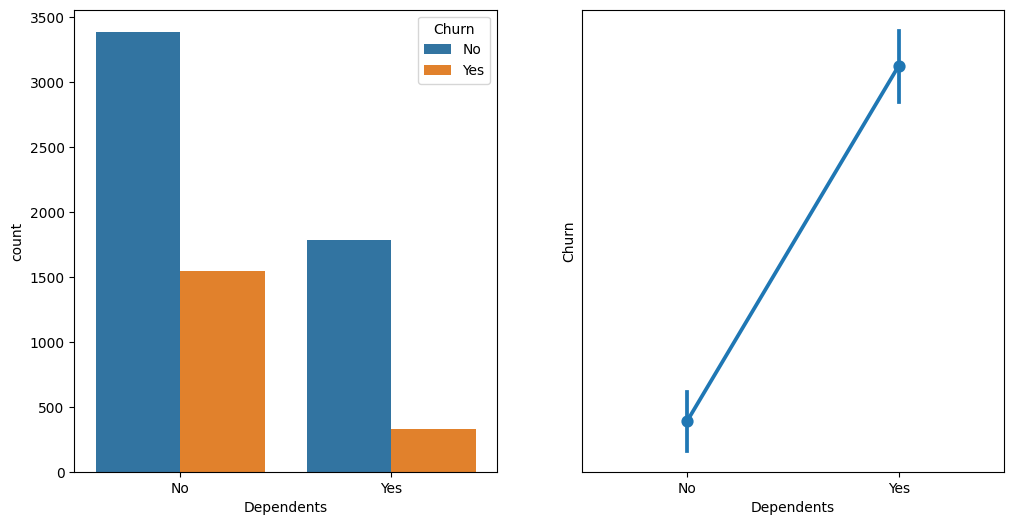

In [ ]:
perform_categorical_eda("Dependents" , hue_y = "Churn")

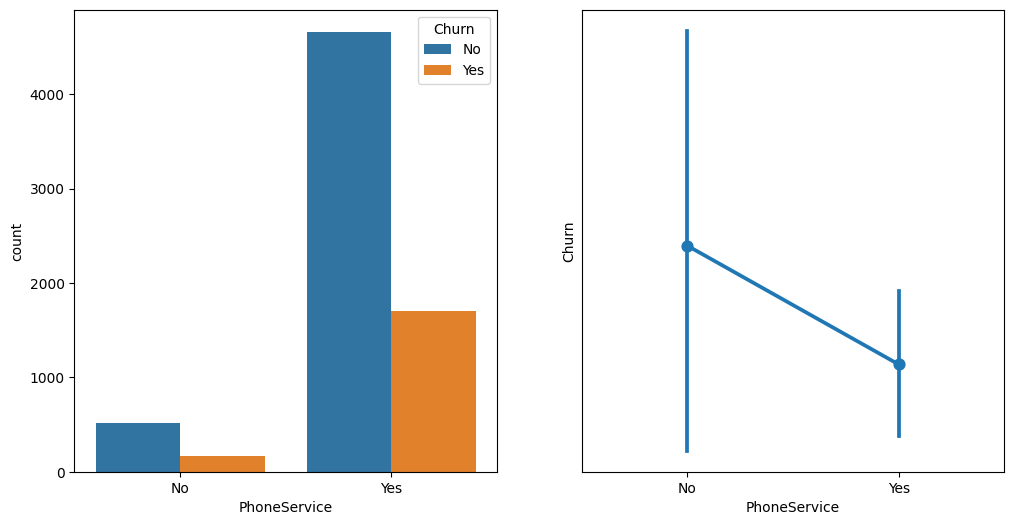

In [ ]:
perform_categorical_eda("PhoneService" , hue_y = "Churn")

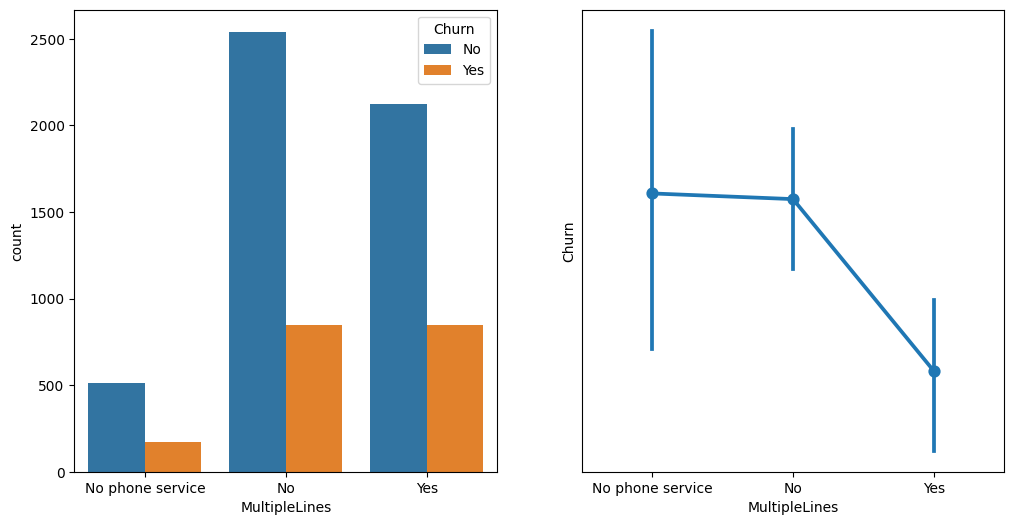

In [ ]:
perform_categorical_eda("MultipleLines" , hue_y = "Churn")

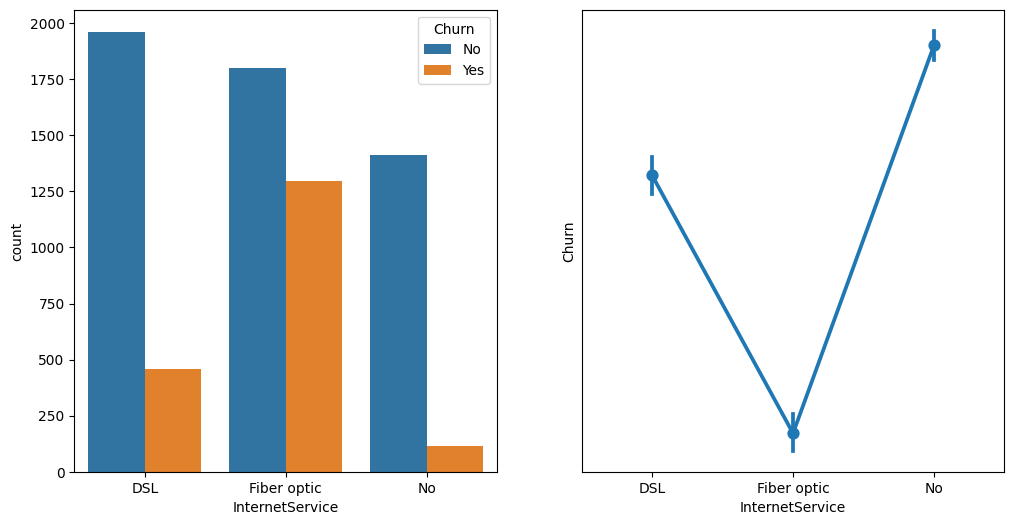

In [ ]:
perform_categorical_eda("InternetService" , hue_y = "Churn")

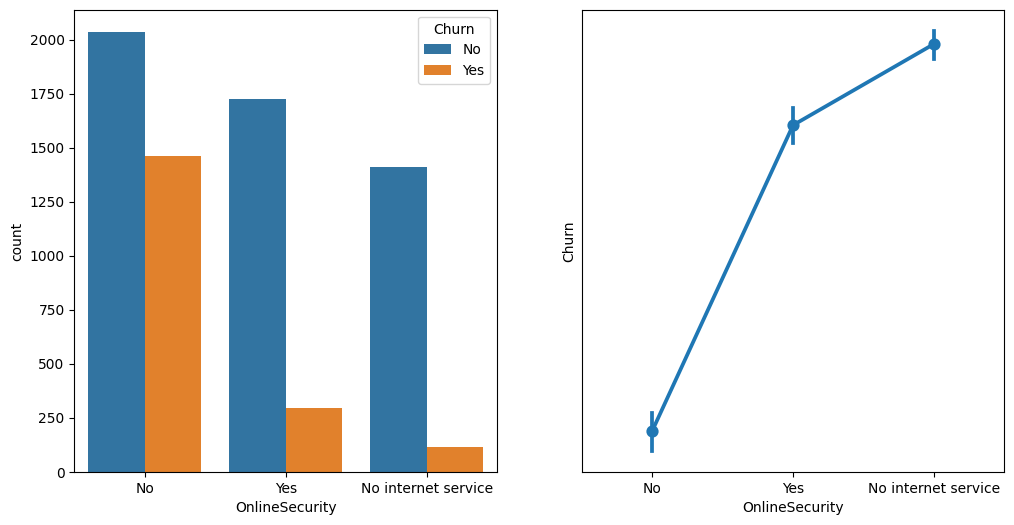

In [ ]:
perform_categorical_eda("OnlineSecurity" , hue_y = "Churn")

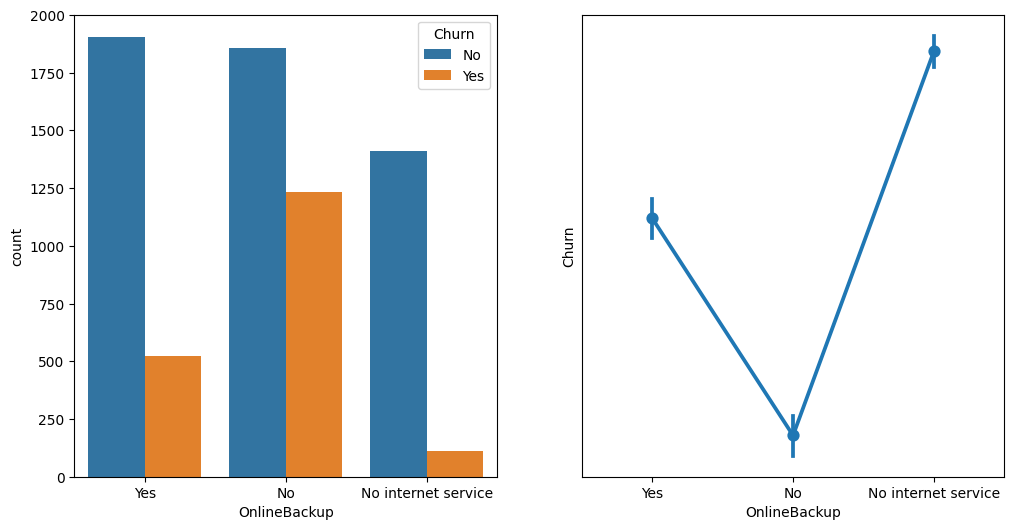

In [ ]:
perform_categorical_eda("OnlineBackup" , hue_y = "Churn")

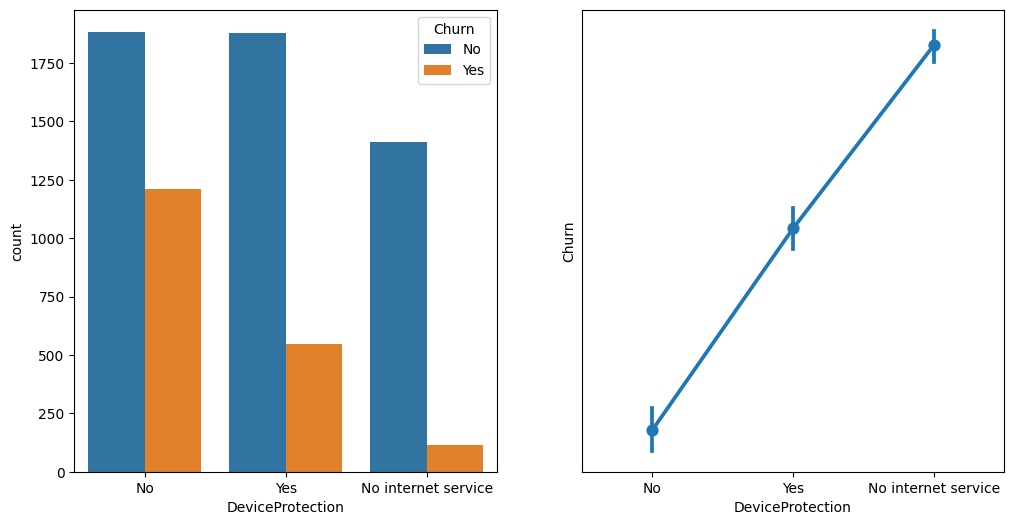

In [ ]:
perform_categorical_eda("DeviceProtection" , hue_y = "Churn")

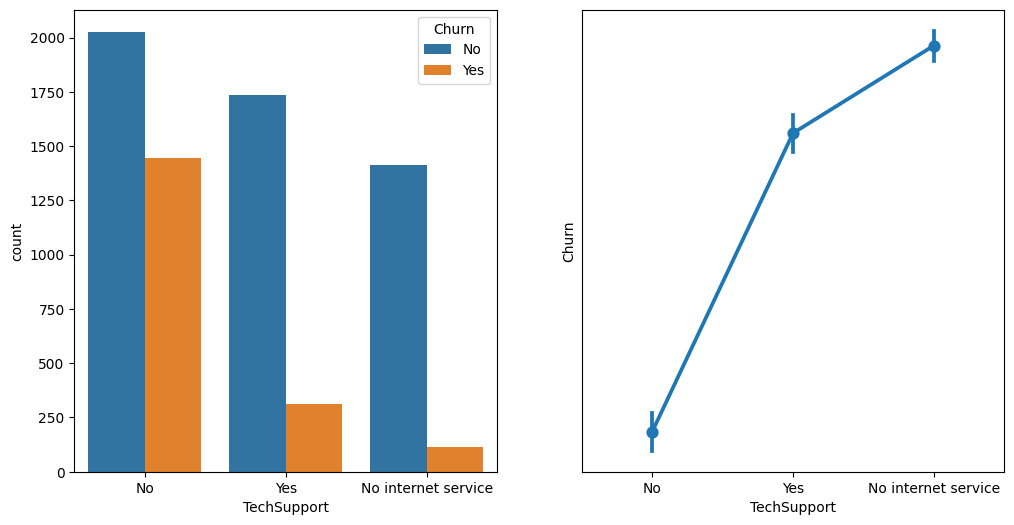

In [ ]:
perform_categorical_eda("TechSupport" , hue_y = "Churn")

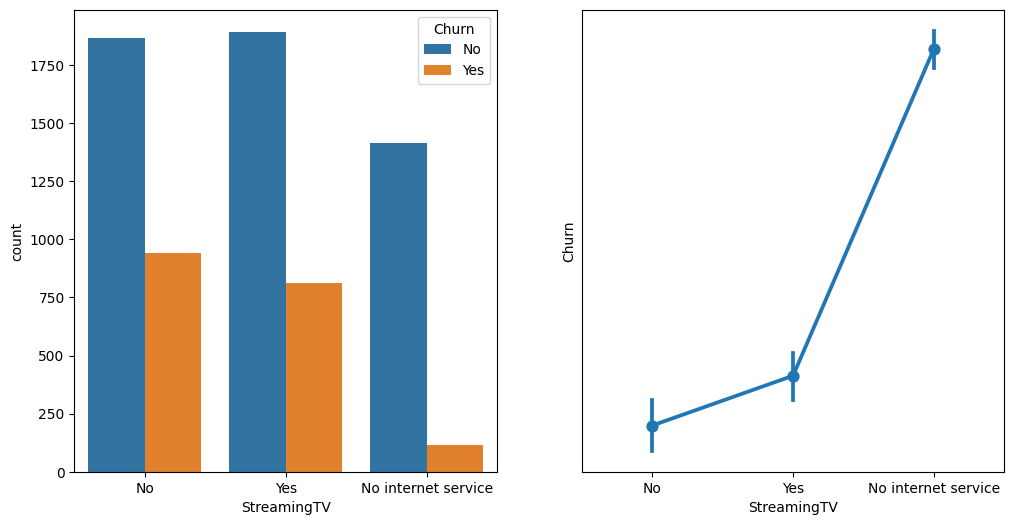

In [ ]:
perform_categorical_eda("StreamingTV" , hue_y = "Churn")

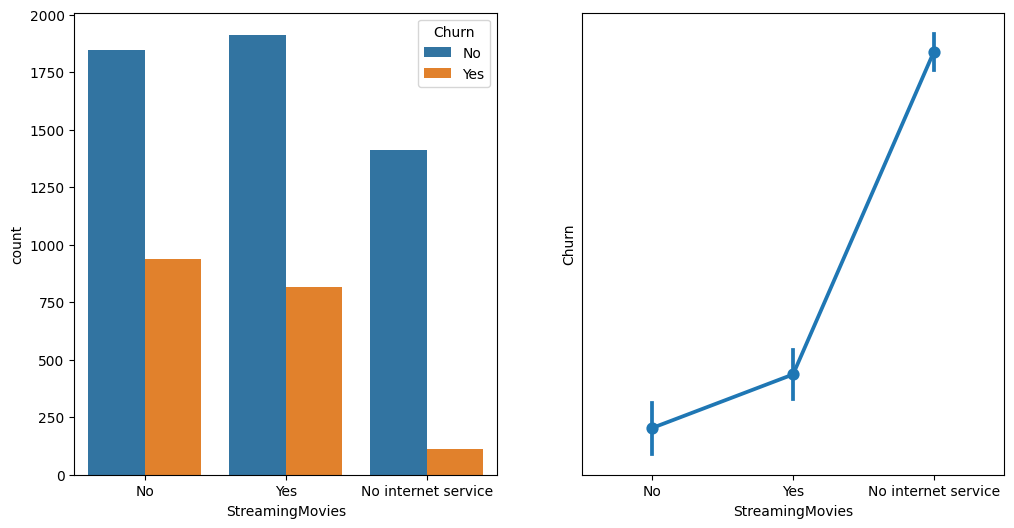

In [ ]:
perform_categorical_eda("StreamingMovies" , hue_y = "Churn")

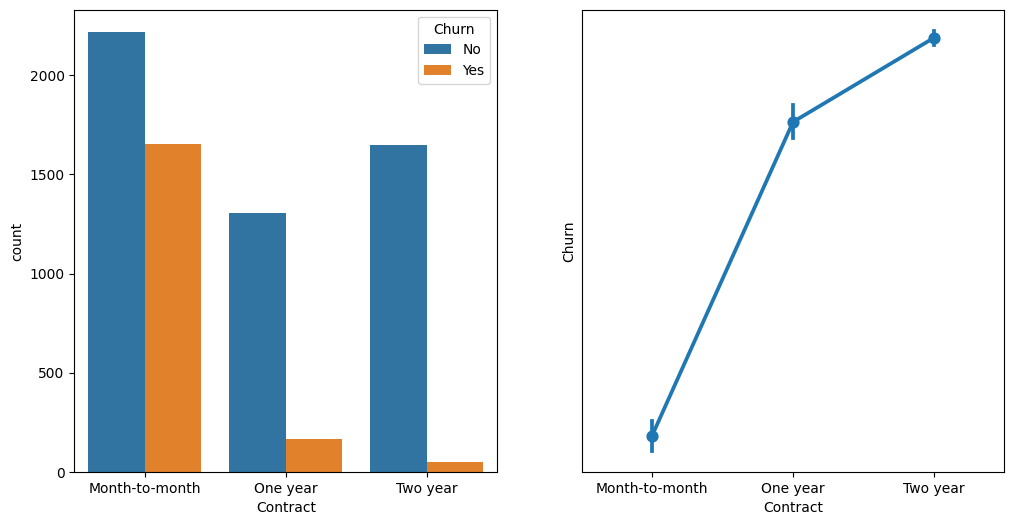

In [ ]:
perform_categorical_eda("Contract" , hue_y = "Churn")

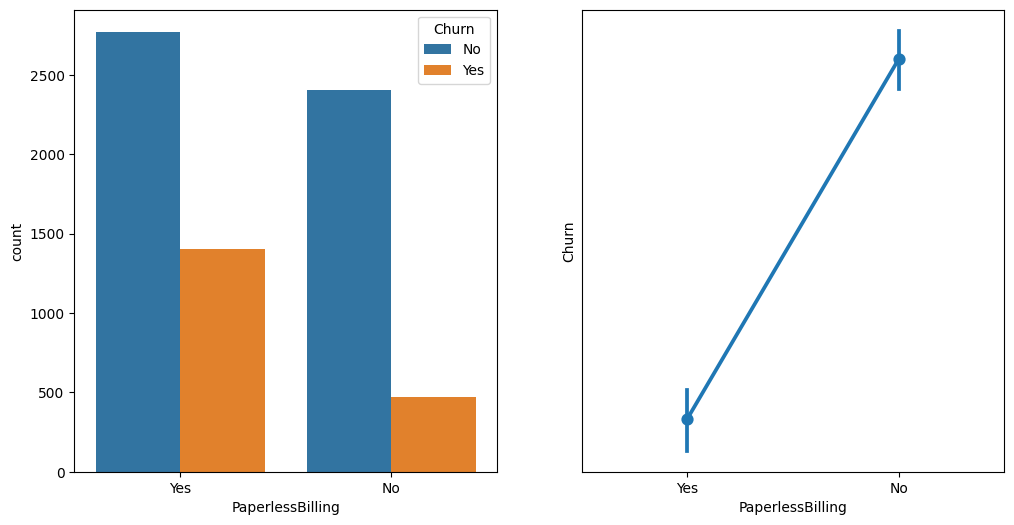

In [ ]:
perform_categorical_eda("PaperlessBilling" , hue_y = "Churn")

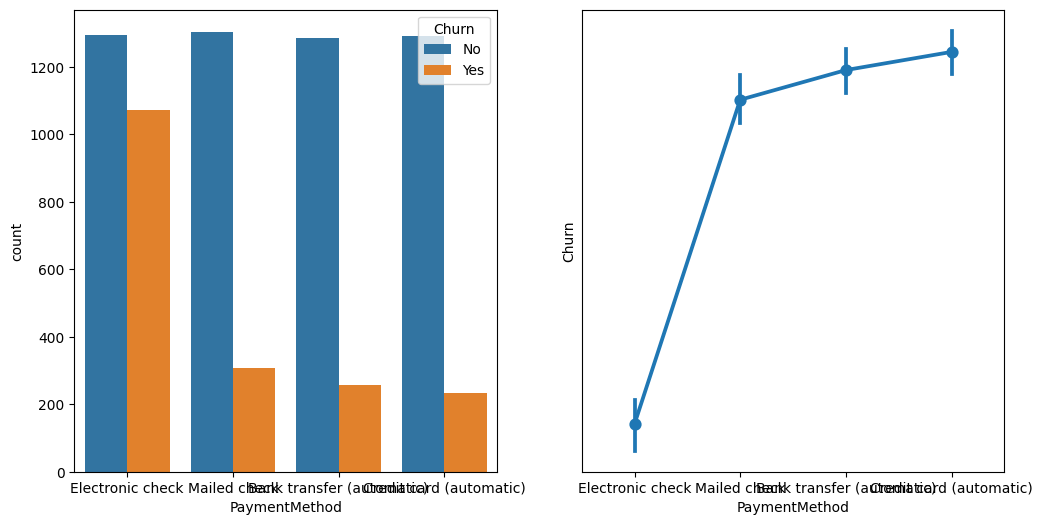

In [ ]:
perform_categorical_eda("PaymentMethod" , hue_y = "Churn")

In [ ]:
## PERFORMING BIVARITES ANALYSIS ON NUMERICAL_DATA
##ADD TARGET (CHURN)

In [ ]:
numerical_data["Churn"]= data["Churn"]

In [ ]:
numerical_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


In [ ]:
## to perform categorical eda
def perform_numerical_eda(col, hue_y ,data=data , numerical_data=numerical_data):
    fig, axs = plt.subplots( nrows =1 , ncols = 2 , figsize =(12, 6))
    sns.countplot (data= numerical_data, x = col, hue = hue_y ,ax =axs[0])
    sns.boxplot( x = col , y = hue_y, data = data ,ax =axs[1])

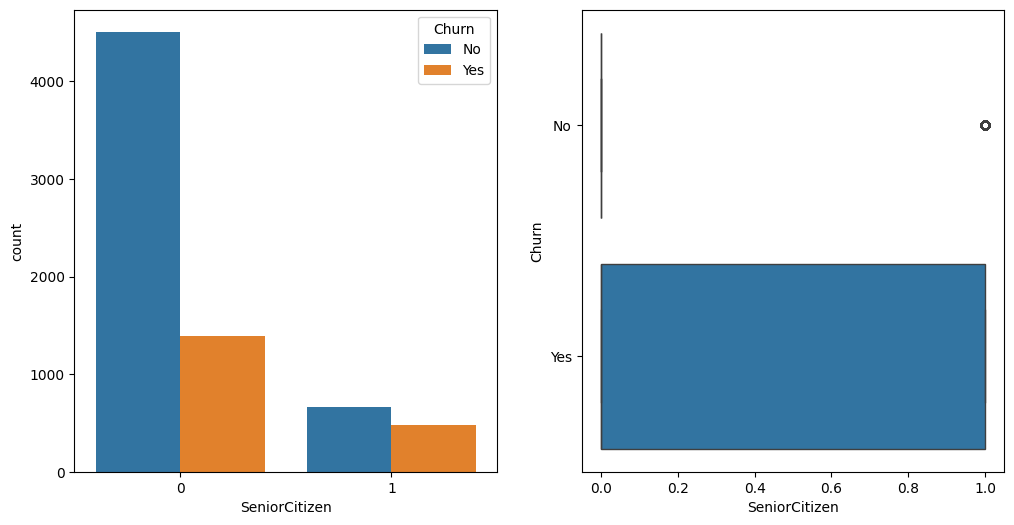

In [ ]:
perform_numerical_eda("SeniorCitizen" , hue_y = "Churn")

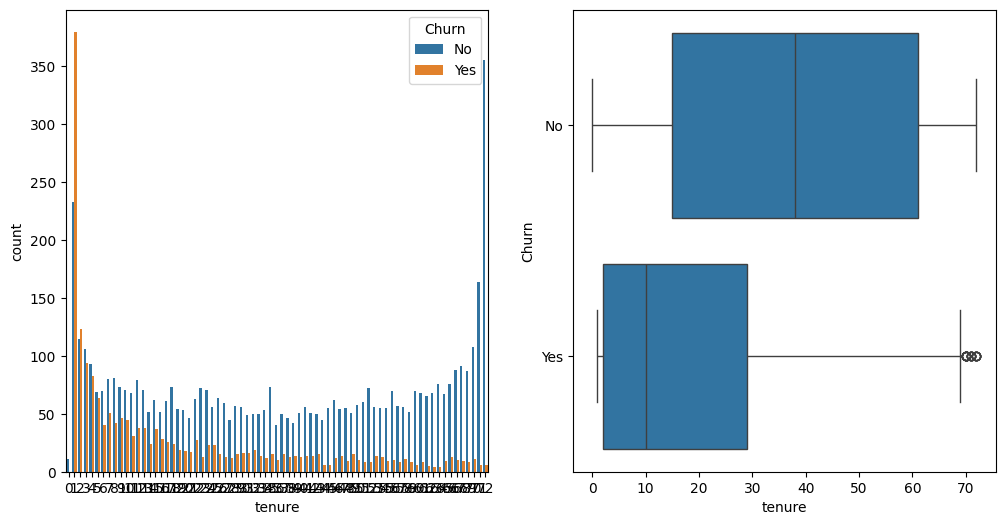

In [ ]:
perform_numerical_eda("tenure" , hue_y = "Churn")

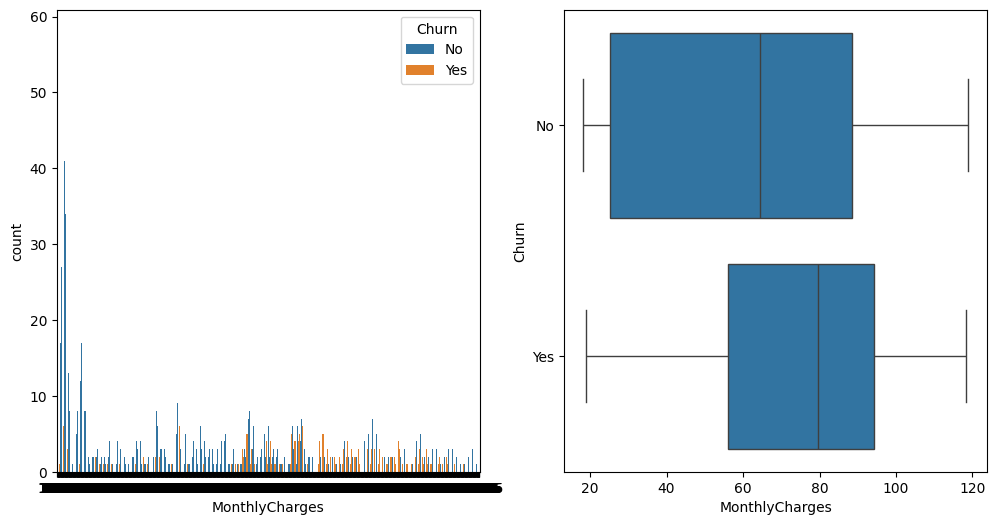

In [ ]:
perform_numerical_eda("MonthlyCharges" , hue_y = "Churn")

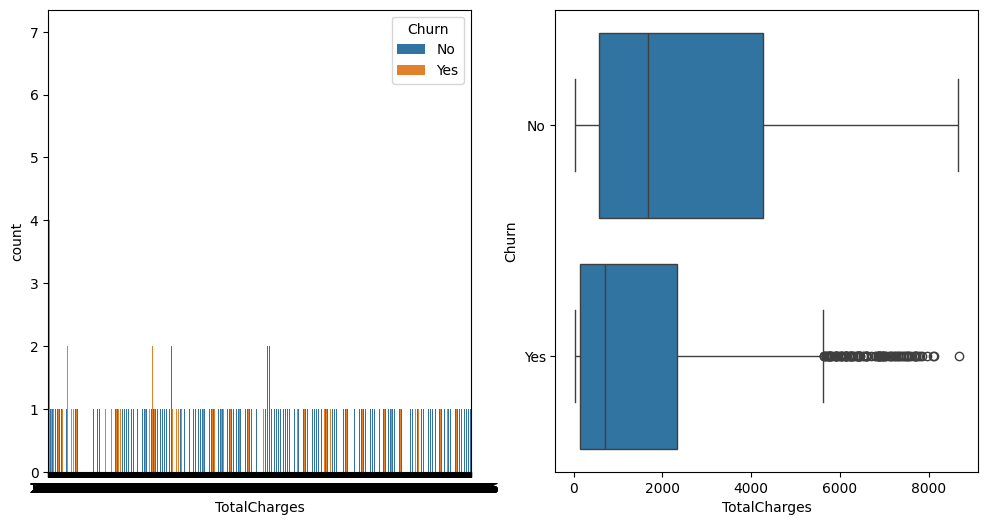

In [ ]:
perform_numerical_eda("TotalCharges" , hue_y = "Churn")

<Axes: >

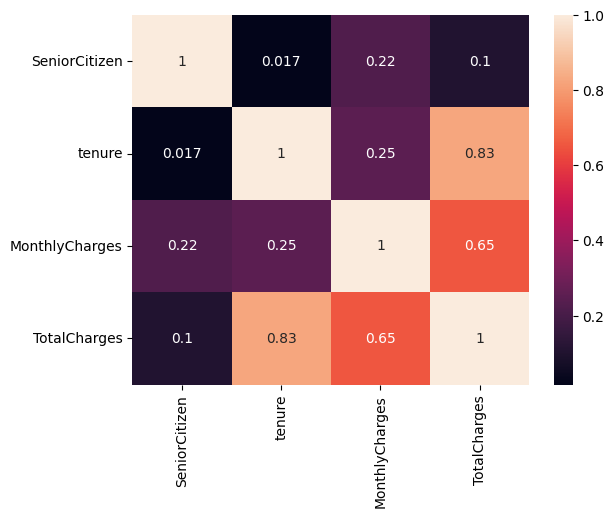

In [ ]:
## multivarites analysis on numerical data
sns.heatmap(data.corr(numeric_only=True),cbar=True, annot=True )

In [ ]:
## Missing value
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
##Median for missing values in numerical column of TotalCharges
## for missing value in Totalcharges :0

In [ ]:
data['TotalCharges']= data['TotalCharges'].fillna(0)

In [ ]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
###  PERFORM LABEL ENCONDING FOR CATEGORICAL COLUMNS
### DROP UNNECCESARY COLUMNS
###WORK ON OUTLIERS BY NORMALISING OR STANDAARDIZING
### SEPARATE INTO TRAIN AND TEST

In [ ]:
labeller = LabelEncoder()
for col in categorical_data.columns:
    data[col] = labeller.fit_transform(data[col])
    label = data[['Churn']]

In [ ]:
scaler= MinMaxScaler()


data["Scaler_Gender"] = scaler.fit_transform(data["gender"].values.reshape(-1, 1))
data["Scaler_SeniorCitizen"] = scaler.fit_transform(data['SeniorCitizen'].values.reshape(-1, 1))
data["Scaler_Partner"] = scaler.fit_transform(data['Partner'].values.reshape(-1, 1))
data["Scaler_Dependents"] = scaler.fit_transform(data['Dependents'].values.reshape(-1, 1))
data["Scaler_tenure"] = scaler.fit_transform(data['tenure'].values.reshape(-1, 1))
data["Scaler_PhoneService"] = scaler.fit_transform(data['PhoneService'].values.reshape(-1, 1))
data["Scaler_MultipleLines"] = scaler.fit_transform(data['MultipleLines'].values.reshape(-1, 1))
data["Scaler_InternetService"] = scaler.fit_transform(data['InternetService'].values.reshape(-1, 1))
data["Scaler_OnlineSecurity"] = scaler.fit_transform(data['OnlineSecurity'].values.reshape(-1, 1))
data["Scaler_OnlineBackup"] = scaler.fit_transform(data['OnlineBackup'].values.reshape(-1, 1))
data["Scaler_DeviceProtection"] = scaler.fit_transform(data['DeviceProtection'].values.reshape(-1, 1))
data["Scaler_TechSupport"] = scaler.fit_transform(data['TechSupport'].values.reshape(-1, 1))
data["Scaler_StreamingTV"] = scaler.fit_transform(data['StreamingTV'].values.reshape(-1, 1))
data["Scaler_StreamingMovies"] = scaler.fit_transform(data['StreamingMovies'].values.reshape(-1, 1))
data["Scaler_Contract"] = scaler.fit_transform(data['Contract'].values.reshape(-1, 1))
data["Scaler_PaperlessBilling"] = scaler.fit_transform(data['PaperlessBilling'].values.reshape(-1, 1))
data["Scaler_PaymentMethod"] = scaler.fit_transform(data['PaymentMethod'].values.reshape(-1, 1))
data["Scaler_MonthlyCharges"] = scaler.fit_transform(data['MonthlyCharges'].values.reshape(-1, 1))
data["Scaler_TotalCharges"] = scaler.fit_transform(data['TotalCharges'].values.reshape(-1, 1))

data.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges','Churn'], axis=1, inplace=True)

data.head()

,Scaler_Gender,Scaler_SeniorCitizen,Scaler_Partner,Scaler_Dependents,Scaler_tenure,Scaler_PhoneService,Scaler_MultipleLines,Scaler_InternetService,Scaler_OnlineSecurity,Scaler_OnlineBackup,Scaler_DeviceProtection,Scaler_TechSupport,Scaler_StreamingTV,Scaler_StreamingMovies,Scaler_Contract,Scaler_PaperlessBilling,Scaler_PaymentMethod,Scaler_MonthlyCharges,Scaler_TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.141654


In [ ]:
label

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
X_train ,X_test, y_train , y_test = train_test_split(data ,label, test_size=0.2, random_state=42)

In [ ]:
# LOGISTICS REGRESSIONN
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ly_pred = logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy:" ,accuracy_score(y_test,ly_pred))
print("Precision:", precision_score(y_test,ly_pred))
print("Recall:",recall_score(y_test,ly_pred))
print("F1_score:", f1_score(y_test , ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.815471965933286
Precision: 0.6877076411960132
Recall: 0.5549597855227882
F1_score: 0.6142433234421364
AUC-ROC: 0.7321130973945987


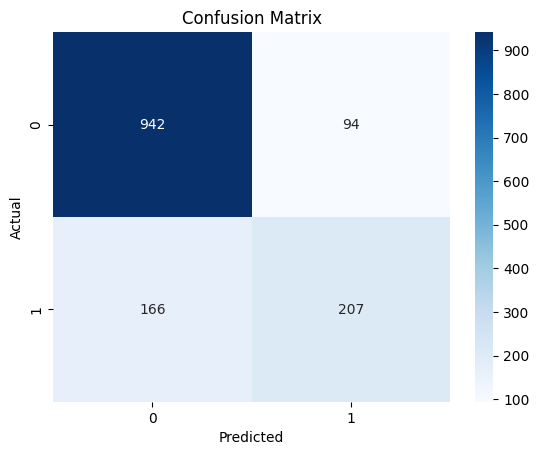

In [ ]:
## create Confussion Matrix
cm = confusion_matrix(y_test, ly_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
## Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Random Forest")
print("Accuracy:" ,accuracy_score(y_test,rfc_pred))
print("Precision:", precision_score(y_test,rfc_pred))
print("Recall:",recall_score(y_test,rfc_pred))
print("F1_score:", f1_score(y_test , rfc_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfc_pred))

Random Forest
Accuracy: 0.7984386089425124
Precision: 0.6654275092936803
Recall: 0.47989276139410186
F1_score: 0.557632398753894
AUC-ROC: 0.6965100872607575


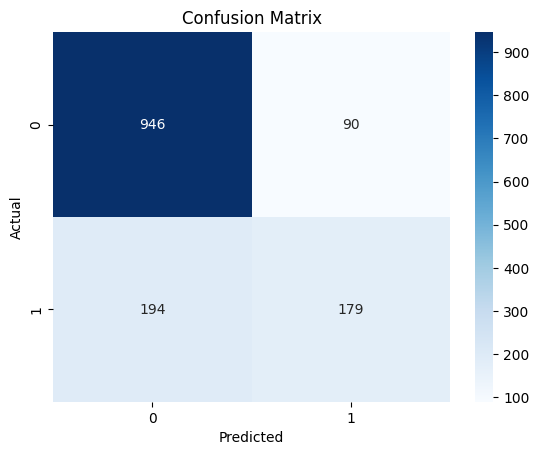

In [ ]:
cm = confusion_matrix(y_test, rfc_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
sgd =  SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print(" SGDClassifier")
print("Accuracy:" ,accuracy_score(y_test,sgd_pred))
print("Precision:", precision_score(y_test,sgd_pred))
print("Recall:",recall_score(y_test,sgd_pred))
print("F1_score:", f1_score(y_test , sgd_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgd_pred))

 SGDClassifier
Accuracy: 0.794180269694819
Precision: 0.5924276169265034
Recall: 0.7131367292225201
F1_score: 0.6472019464720195
AUC-ROC: 0.7682479012907967


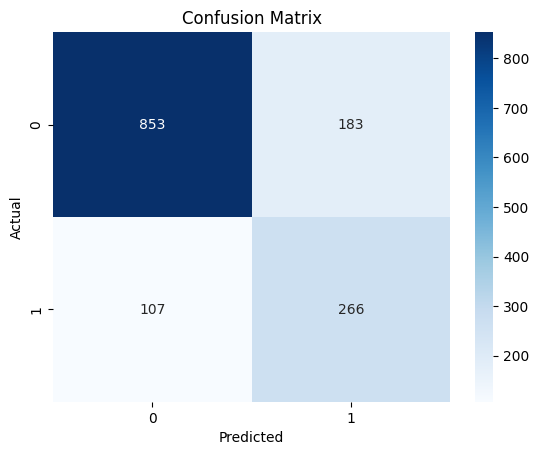

In [ ]:
cm = confusion_matrix(y_test, sgd_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues",fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBClassifier")
print("Accuracy:" ,accuracy_score(y_test,xgb_pred))
print("Precision:", precision_score(y_test,xgb_pred))
print("Recall:",recall_score(y_test,xgb_pred))
print("F1_score:", f1_score(y_test , xgb_pred))
print("AUC-ROC:", roc_auc_score(y_test, xgb_pred))

XGBClassifier
Accuracy: 0.7927608232789212
Precision: 0.6253869969040248
Recall: 0.5415549597855228
F1_score: 0.5804597701149425
AUC-ROC: 0.7123797964950779


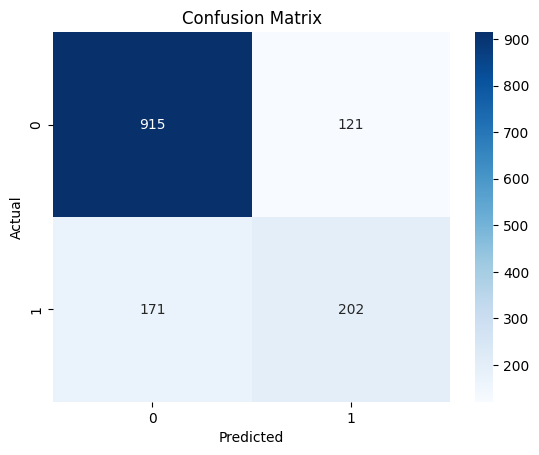

In [ ]:
cm = confusion_matrix(y_test, xgb_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()